In [4]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter


In [11]:

# Set style for better visualizations
sns.set_style("whitegrid")
sns.set_palette("husl")

# Load your dataset
df = pd.read_csv('..\\data\\scraped\\apartmentsdata.csv')  # Replace with your data loading method

In [12]:
# 1. Initial Data Exploration
print("Dataset Overview:")
print("-" * 50)
print("\nDataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Basic statistics
print("\nNumerical Columns Statistics:\n", df.describe())

Dataset Overview:
--------------------------------------------------

Dataset Shape: (11704, 11)

Columns: ['area', 'city', 'floor', 'location', 'price', 'rooms', 'source', 'square_price', 'title', 'Unnamed: 9', 'Unnamed: 10']

Data Types:
 area              int64
city             object
floor            object
location         object
price             int64
rooms           float64
source           object
square_price      int64
title            object
Unnamed: 9       object
Unnamed: 10      object
dtype: object

Missing Values:
 area                0
city                0
floor             118
location            0
price               0
rooms               0
source              0
square_price        0
title               0
Unnamed: 9      11699
Unnamed: 10     11703
dtype: int64

Numerical Columns Statistics:
                area         price         rooms  square_price
count  11704.000000  1.170400e+04  11704.000000  11704.000000
mean      67.707536  1.648675e+05      2.573864   23

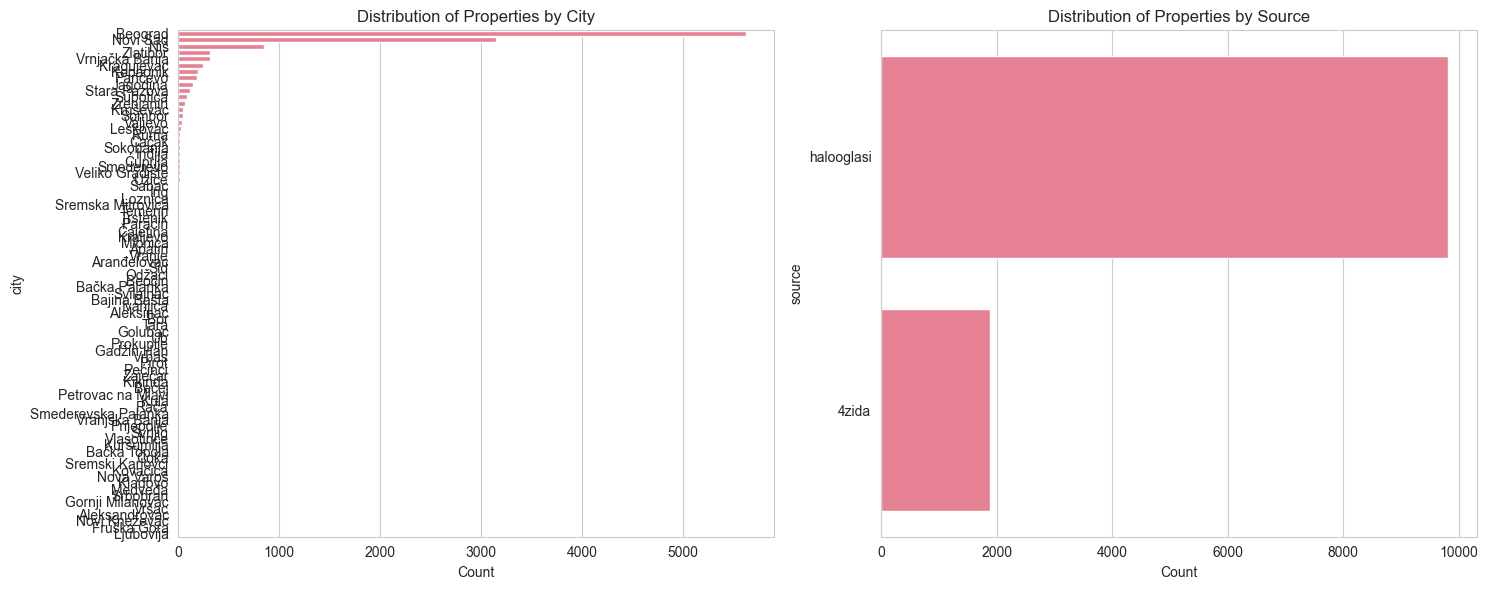


City Distribution (%):
city
Beograd           48.00
Novi Sad          26.84
Niš                7.21
Zlatibor           2.68
Vrnjačka Banja     2.67
                  ...  
Vršac              0.01
Aleksandrovac      0.01
Novi Kneževac      0.01
Fruška Gora        0.01
Ljubovija          0.01
Name: proportion, Length: 80, dtype: float64

Source Distribution (%):
source
halooglasi    83.95
4zida         16.05
Name: proportion, dtype: float64


In [13]:

# 2. Categorical Variables Analysis
# Create plots for city and source distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# City distribution
city_counts = df['city'].value_counts()
sns.barplot(x=city_counts.values, y=city_counts.index, ax=axes[0])
axes[0].set_title('Distribution of Properties by City')
axes[0].set_xlabel('Count')

# Source distribution
source_counts = df['source'].value_counts()
sns.barplot(x=source_counts.values, y=source_counts.index, ax=axes[1])
axes[1].set_title('Distribution of Properties by Source')
axes[1].set_xlabel('Count')

plt.tight_layout()
plt.show()

# Print percentage distributions
print("\nCity Distribution (%):")
print(df['city'].value_counts(normalize=True).multiply(100).round(2))

print("\nSource Distribution (%):")
print(df['source'].value_counts(normalize=True).multiply(100).round(2))

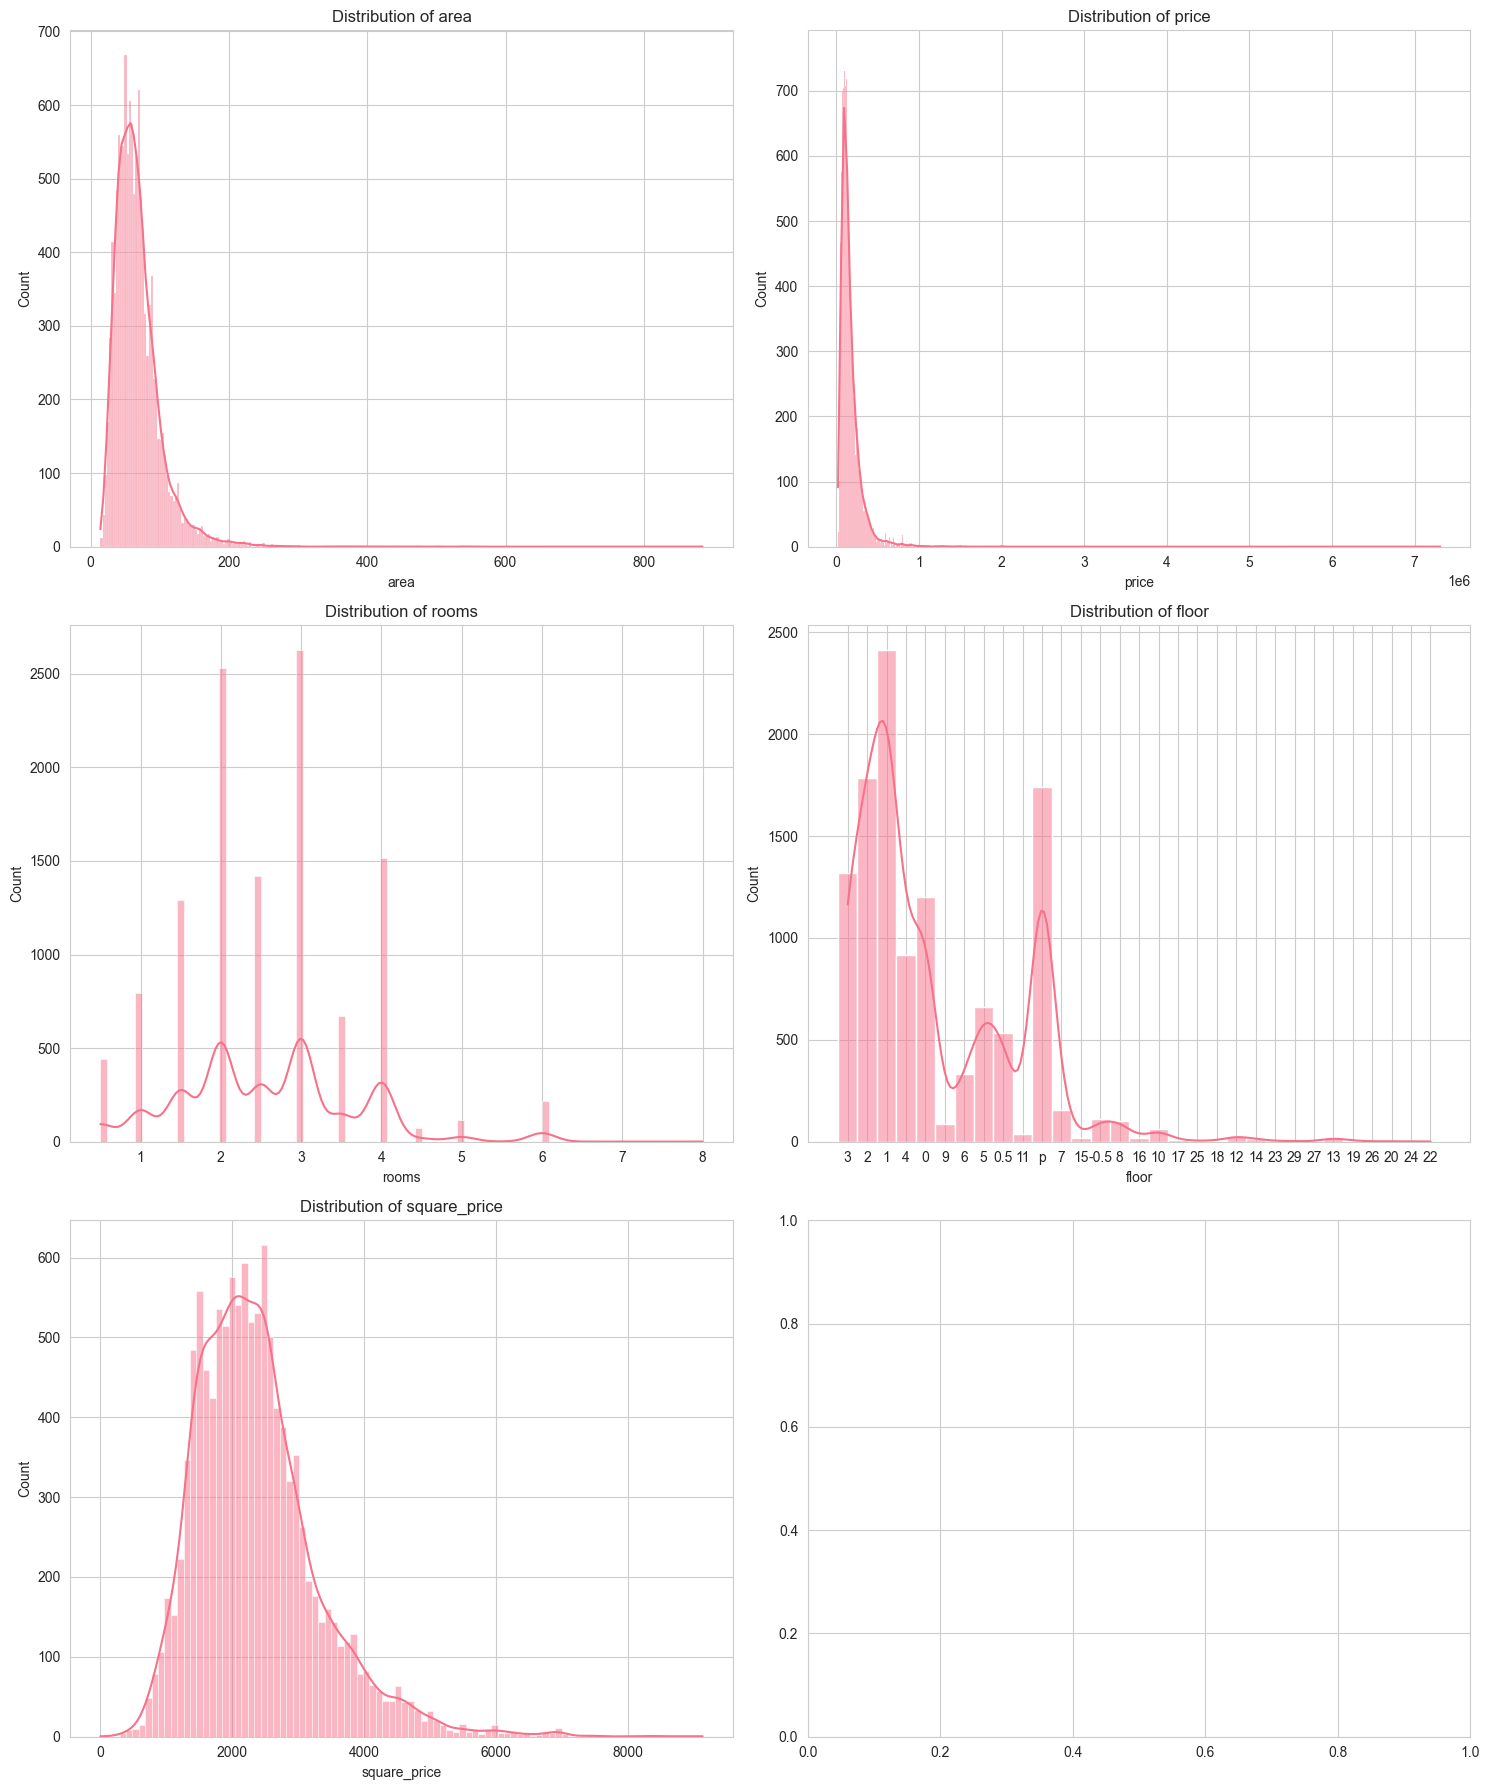

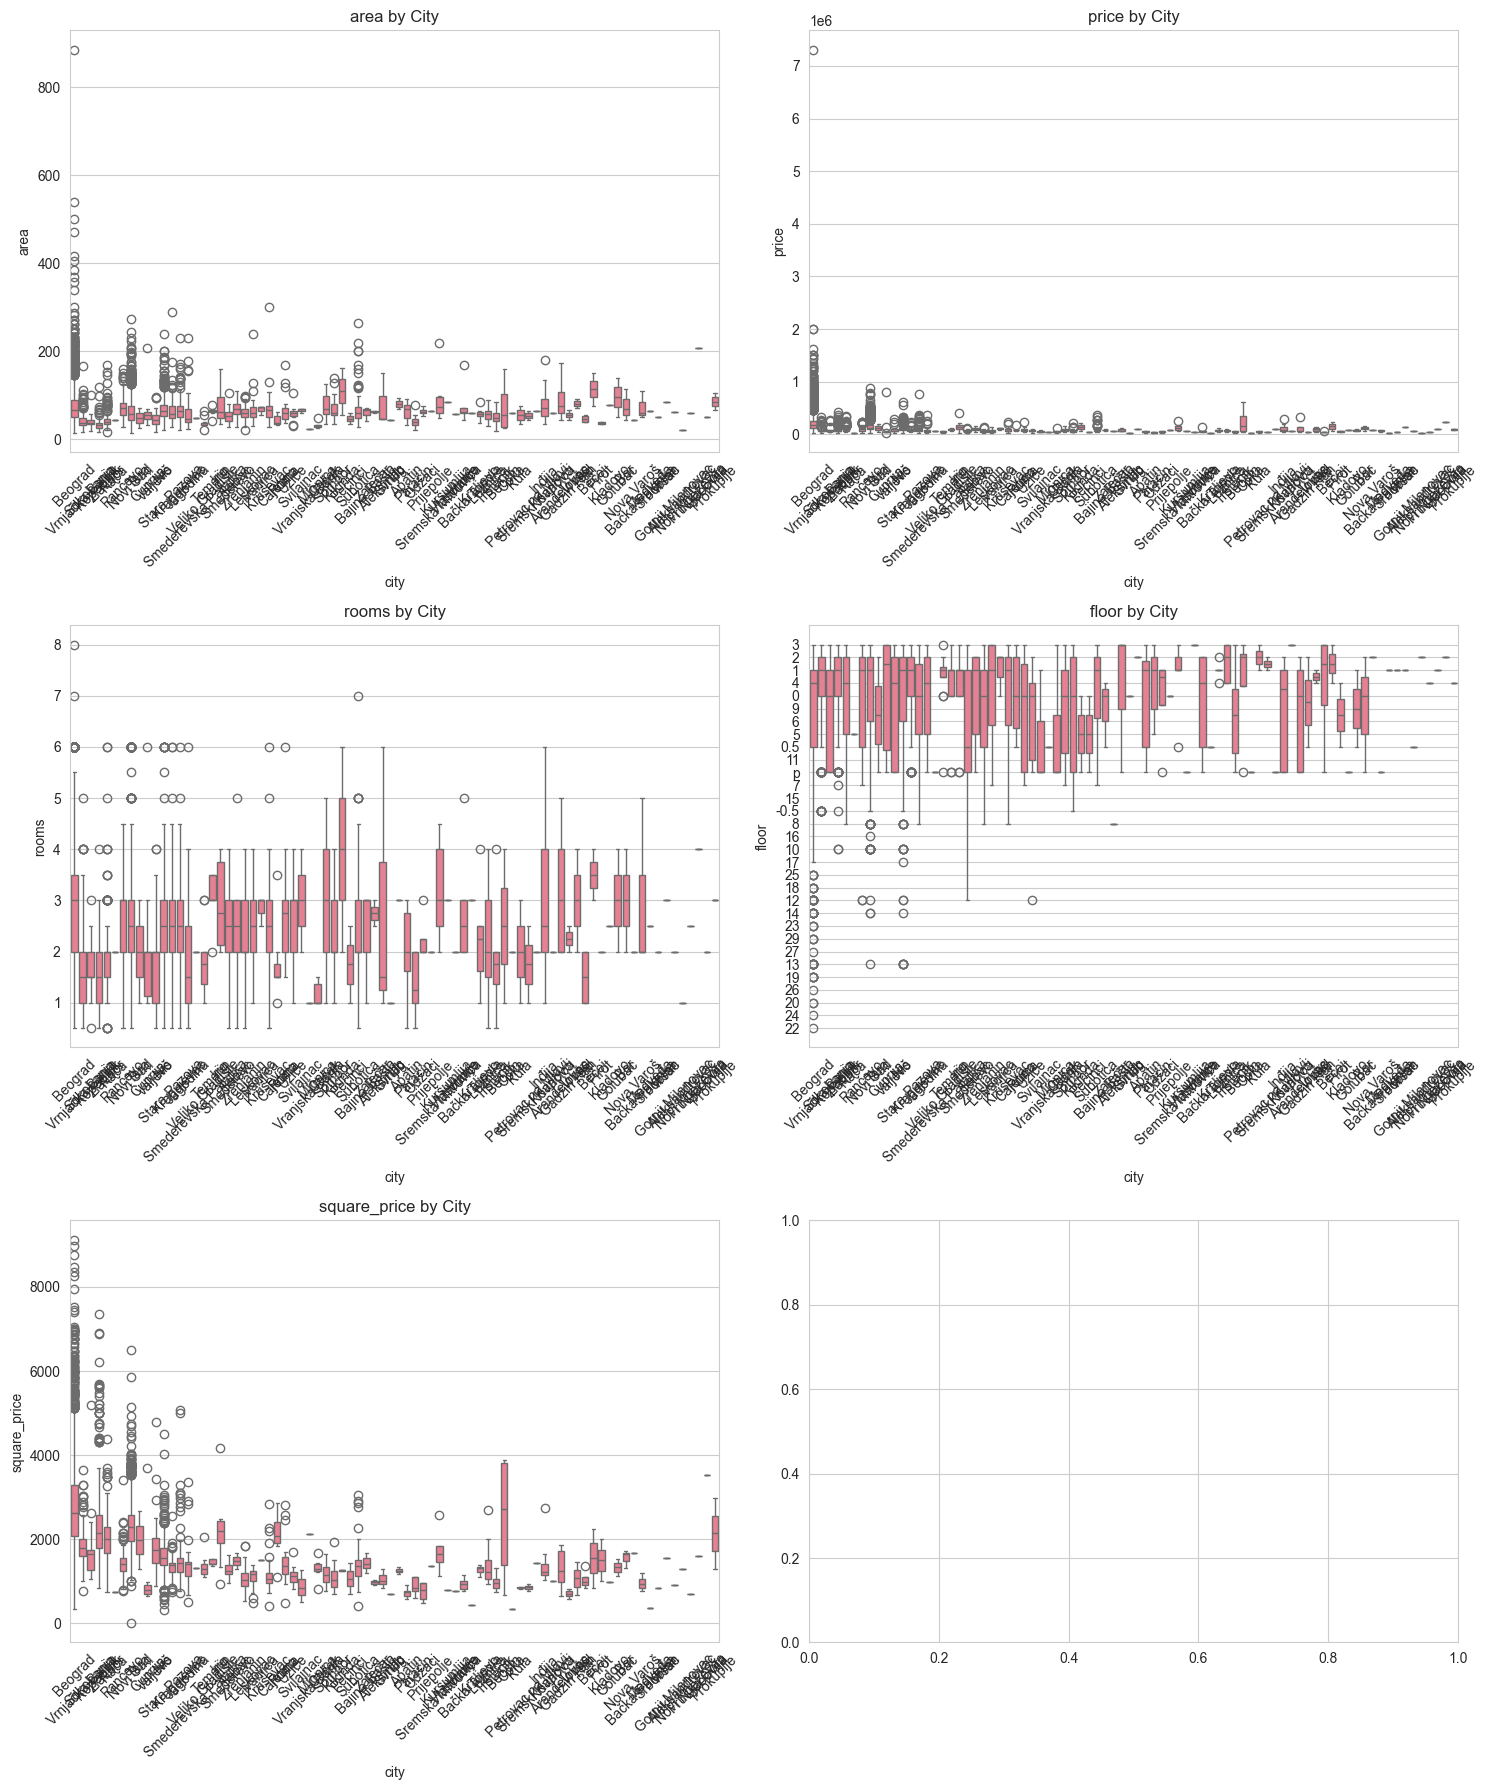

ValueError: could not convert string to float: 'p'

In [14]:


# 3. Numerical Variables Analysis
numerical_cols = ['area', 'price', 'rooms', 'floor', 'square_price']

# Distribution plots
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.histplot(data=df, x=col, kde=True, ax=axes[idx])
        axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Box plots for numerical variables by city
fig, axes = plt.subplots(3, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        sns.boxplot(data=df, x='city', y=col, ax=axes[idx])
        axes[idx].set_title(f'{col} by City')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()


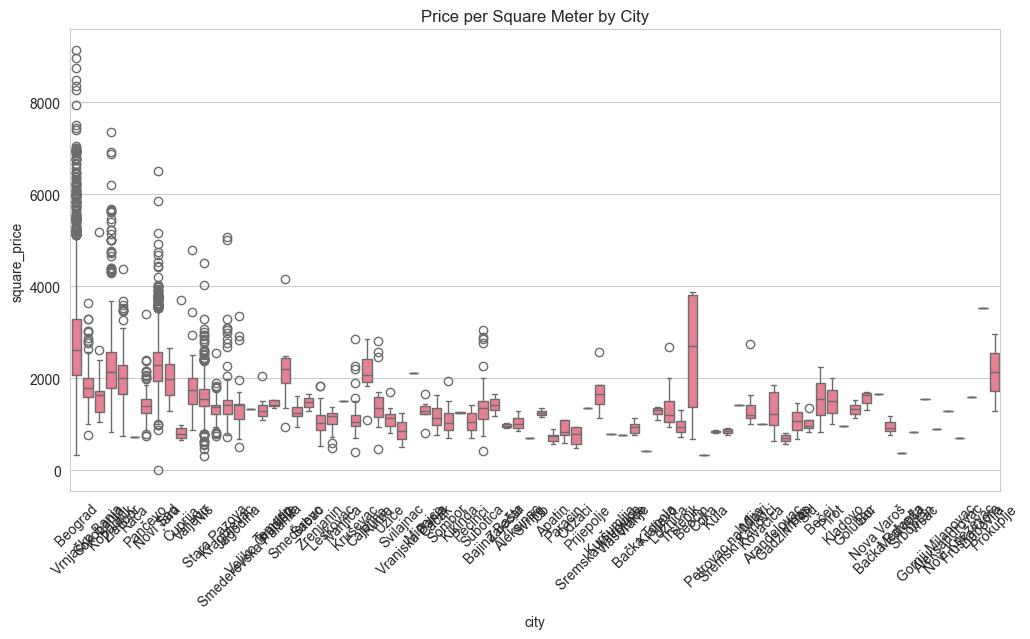

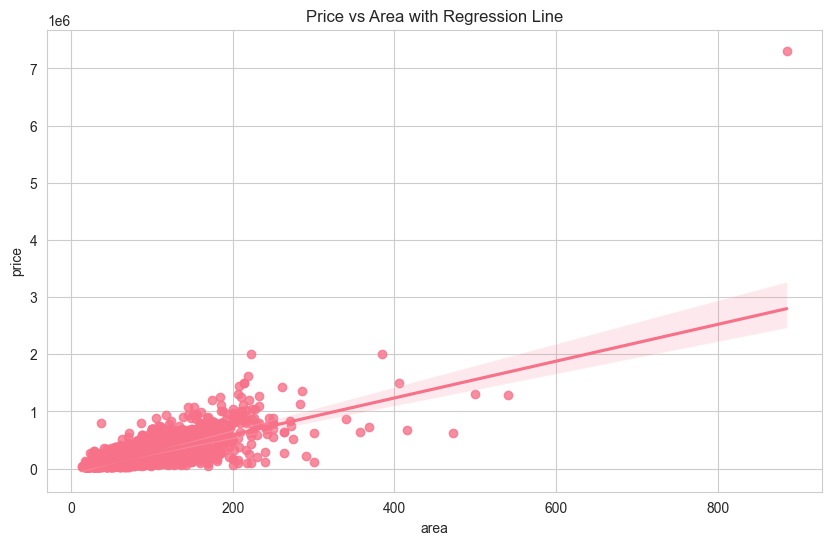

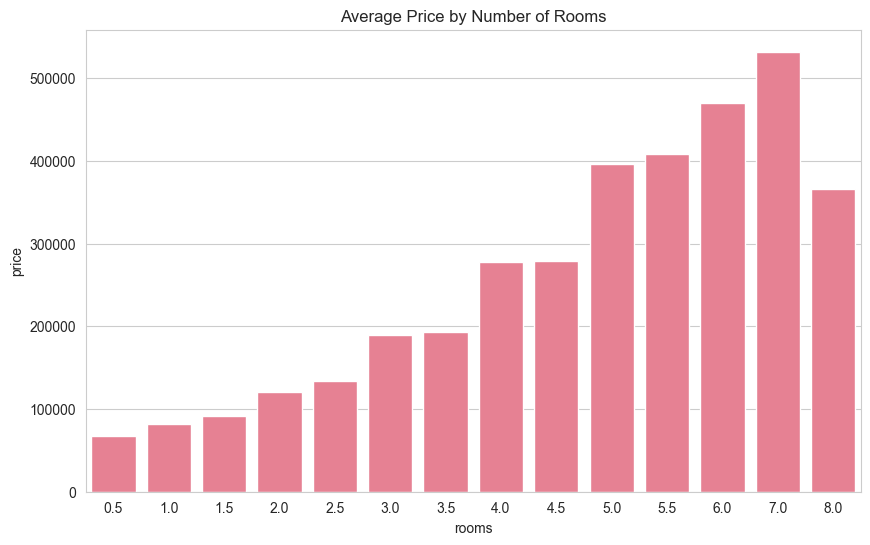


Price Statistics by City:
               count           mean            std      min      25%      50%  \
city                                                                            
Aleksandrovac    1.0   28600.000000            NaN  28600.0  28600.0  28600.0   
Aleksinac        3.0   83900.000000   37806.480926  60200.0  62100.0  64000.0   
Apatin           6.0   44916.666667   12674.449363  30000.0  34750.0  44500.0   
Aranđelovac      5.0  126910.800000  114158.262001  53000.0  58000.0  70000.0   
Bajina Bašta     3.0   83666.666667   12662.279942  70000.0  78000.0  86000.0   
...              ...            ...            ...      ...      ...      ...   
Čajetina         7.0   92485.714286   39523.639701  65000.0  72500.0  83000.0   
Čačak           19.0   86813.157895   32048.833581  40000.0  63500.0  85000.0   
Čoka             1.0   19800.000000            NaN  19800.0  19800.0  19800.0   
Šabac           10.0   98412.000000   36543.929364  41500.0  84000.0  99710.0   
Š

In [15]:

# 4. Price Analysis
# Price per square meter by city
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='city', y='square_price')
plt.title('Price per Square Meter by City')
plt.xticks(rotation=45)
plt.show()

# Price vs Area scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='area', y='price')
plt.title('Price vs Area with Regression Line')
plt.show()

# Average price by number of rooms
avg_price_by_rooms = df.groupby('rooms')['price'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_price_by_rooms, x='rooms', y='price')
plt.title('Average Price by Number of Rooms')
plt.show()

# Calculate and print price statistics by city
print("\nPrice Statistics by City:")
print(df.groupby('city')['price'].describe())

# Calculate and print square price statistics by city
print("\nPrice per Square Meter Statistics by City:")
print(df.groupby('city')['square_price'].describe())

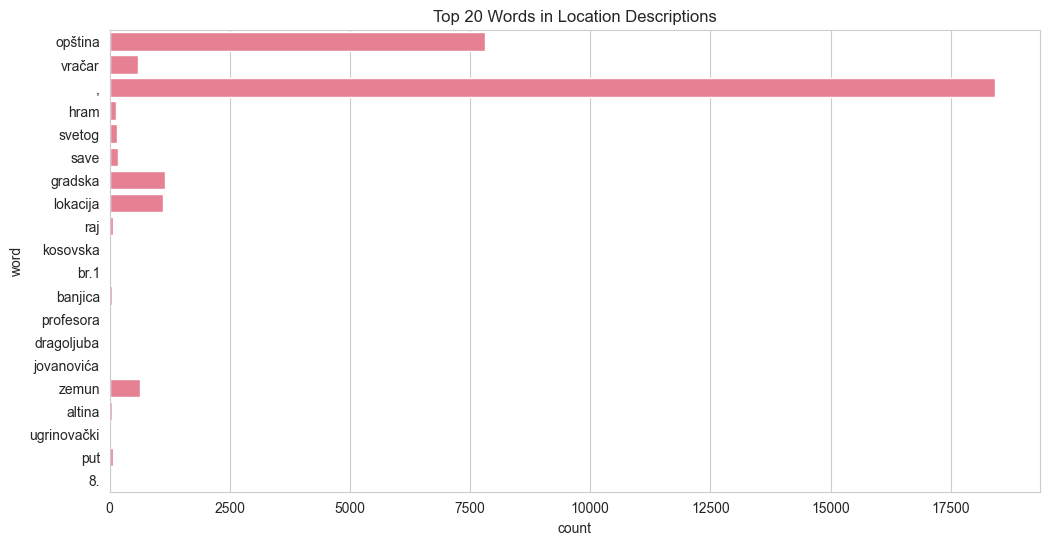

In [16]:
# 5. Location Analysis
# Word frequency in location descriptions
location_words = ' '.join(df['location'].astype(str)).lower().split()
word_freq = Counter(location_words)

# Remove common words and numbers
common_words = {'in', 'on', 'at', 'the', 'and', 'or', 'of', 'to', 'for'}
word_freq = {k: v for k, v in word_freq.items() 
if k not in common_words and not k.isdigit()}

# Plot top 20 location words
plt.figure(figsize=(12, 6))
words = pd.DataFrame(list(word_freq.items())[:20], columns=['word', 'count'])
sns.barplot(data=words, x='count', y='word')
plt.title('Top 20 Words in Location Descriptions')
plt.show()

In [17]:



# 6. Outlier Analysis
# Calculate Z-scores for numerical columns
z_scores = pd.DataFrame()
for col in numerical_cols:
    z_scores[col] = np.abs(stats.zscore(df[col]))

# Identify outliers (Z-score > 3)
outliers = pd.DataFrame()
for col in numerical_cols:
    outliers[col] = (z_scores[col] > 3).sum()

print("\nNumber of outliers per column (Z-score > 3):")
print(outliers.T)



ValueError: could not convert string to float: 'p'

In [18]:
# Print summary of extreme values
print("\nExtreme values in the dataset:")
for col in numerical_cols:
    print(f"\nTop 5 highest {col}:")
    print(df.nlargest(5, col)[[col, 'city', 'price']])


Extreme values in the dataset:

Top 5 highest area:
      area     city    price
56     885  Beograd  7310888
8027   540  Beograd  1280000
5533   500  Beograd  1300000
9669   472  Beograd   615000
953    416  Beograd   670000

Top 5 highest price:
        price     city    price
56    7310888  Beograd  7310888
6130  2000000  Beograd  2000000
7943  2000000  Beograd  2000000
8496  1617000  Beograd  1617000
6161  1500000  Beograd  1500000

Top 5 highest rooms:
       rooms      city    price
10413    8.0   Beograd   366000
10414    7.0   Beograd   800000
11233    7.0  Subotica   264000
56       6.0   Beograd  7310888
204      6.0   Beograd   629265

Top 5 highest floor:


TypeError: Column 'floor' has dtype object, cannot use method 'nlargest' with this dtype